# Movie Ppl
## aka The Poach List
### aka The Hit List

In [329]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [330]:
!ls

Dani                         imdb_combined_prof.csv
DataClean_Nick.ipynb         movies_gross_clean.csv
Data_cleaning_marvel.ipynb   profitability_join.ipynb
Nick_movieppl_analysis.ipynb theNumbers_clean.csv
README.md                    twitter_reviews_clean.csv
cleanIMDB                    zippedData


In [331]:
namekey = pd.read_csv('cleanIMDB/imdb_namekey.csv', index_col=0)

In [332]:
comp = pd.read_csv('imdb_combined_prof.csv', )

In [333]:
comp.head()

,Unnamed: 0,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,...,worldwide_gross,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf
0,0,20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"['Action', 'Animation', 'Comedy']",1.9,8248.0,...,73706,-0.998362,-44926294,2012,December,1.19,8.771014e+04,0.000000e+00,53550000.0,-5.346229e+07
1,1,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"['Adventure', 'Comedy', 'Drama']",7.3,275300.0,...,187861183,1.064409,96861183,2013,December,1.17,2.197976e+08,6.813710e+07,106470000.0,1.133276e+08
2,2,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"['Action', 'Crime', 'Drama']",6.5,105116.0,...,62108587,1.218164,34108587,2014,September,1.15,7.142488e+07,2.992034e+07,32200000.0,3.922488e+07
3,3,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"['Action', 'Adventure', 'Sci-Fi']",7.0,539338.0,...,1648854864,6.669092,1433854864,2015,June,1.15,1.896183e+09,7.501112e+08,247250000.0,1.648933e+09
4,4,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"['Comedy', 'Drama']",6.2,94787.0,...,21544732,-0.521228,-23455268,2011,October,1.21,2.606913e+07,1.586288e+07,54450000.0,-2.838087e+07


In [334]:
# remove unnecessary columns
comp.drop(axis=1, labels=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'id', 'concat'], inplace=True)

In [335]:
comp.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'directors',
       'writers', 'actor', 'actress', 'archive_footage', 'archive_sound',
       'cinematographer', 'composer', 'director_pr', 'editor', 'producer',
       'production_designer', 'self', 'writer_pr', 'release_date', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'ROI %',
       'ROI $', 'year', 'month', 'inflation', 'worldwide_gross_inf',
       'domestic_gross_inf', 'production_budget_inf', 'ROI $ Inf'],
      dtype='object')

In [336]:
comp.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,...,worldwide_gross,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"['Action', 'Animation', 'Comedy']",1.9,8248.0,['nm0440415'],"['nm0440415', 'nm0923312', 'nm0295165', 'nm084...",...,73706,-0.998362,-44926294,2012,December,1.19,8.771014e+04,0.000000e+00,53550000.0,-5.346229e+07
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"['Adventure', 'Comedy', 'Drama']",7.3,275300.0,['nm0001774'],"['nm0175726', 'nm0862122']",...,187861183,1.064409,96861183,2013,December,1.17,2.197976e+08,6.813710e+07,106470000.0,1.133276e+08
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"['Action', 'Crime', 'Drama']",6.5,105116.0,['nm0291082'],"['nm0088747', 'nm0291082']",...,62108587,1.218164,34108587,2014,September,1.15,7.142488e+07,2.992034e+07,32200000.0,3.922488e+07
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"['Action', 'Adventure', 'Sci-Fi']",7.0,539338.0,['nm1119880'],"['nm0415425', 'nm0798646', 'nm1119880', 'nm208...",...,1648854864,6.669092,1433854864,2015,June,1.15,1.896183e+09,7.501112e+08,247250000.0,1.648933e+09
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"['Comedy', 'Drama']",6.2,94787.0,['nm0732430'],"['nm0732430', 'nm0860219']",...,21544732,-0.521228,-23455268,2011,October,1.21,2.606913e+07,1.586288e+07,54450000.0,-2.838087e+07


In [337]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tconst                 1422 non-null   object 
 1   primary_title          1422 non-null   object 
 2   original_title         1422 non-null   object 
 3   start_year             1422 non-null   int64  
 4   runtime_minutes        1408 non-null   float64
 5   genres                 1418 non-null   object 
 6   averagerating          1392 non-null   float64
 7   numvotes               1392 non-null   float64
 8   directors              1417 non-null   object 
 9   writers                1396 non-null   object 
 10  actor                  1355 non-null   object 
 11  actress                1213 non-null   object 
 12  archive_footage        3 non-null      object 
 13  archive_sound          1 non-null      object 
 14  cinematographer        420 non-null    object 
 15  comp

In [338]:
# if possible, convert list-looking strings into actual lists for df.explode()
def lit_try(val):
    try:
        return literal_eval(val)
    except:
        return val

In [339]:
comp.iloc[:,8:22] = comp.iloc[:,8:22].applymap(lit_try)

In [340]:
comp['director'] = comp['directors'] + comp['director_pr']

In [341]:
comp['writer'] = comp['writers'] + comp['writer_pr']

In [342]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tconst                 1422 non-null   object 
 1   primary_title          1422 non-null   object 
 2   original_title         1422 non-null   object 
 3   start_year             1422 non-null   int64  
 4   runtime_minutes        1408 non-null   float64
 5   genres                 1418 non-null   object 
 6   averagerating          1392 non-null   float64
 7   numvotes               1392 non-null   float64
 8   directors              1417 non-null   object 
 9   writers                1396 non-null   object 
 10  actor                  1355 non-null   object 
 11  actress                1213 non-null   object 
 12  archive_footage        3 non-null      object 
 13  archive_sound          1 non-null      object 
 14  cinematographer        420 non-null    object 
 15  comp

In [343]:
# make %ROI columns adjusted for inflation
comp['total_gross_inf'] = comp['worldwide_gross_inf']+comp['domestic_gross_inf']
comp['ROI_infadj'] = (comp['total_gross_inf']-comp['production_budget_inf'])/comp['production_budget_inf']
comp['ROI_infadj%'] = comp['ROI_infadj']*100

In [344]:
comp.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'directors',
       'writers', 'actor', 'actress', 'archive_footage', 'archive_sound',
       'cinematographer', 'composer', 'director_pr', 'editor', 'producer',
       'production_designer', 'self', 'writer_pr', 'release_date', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'ROI %',
       'ROI $', 'year', 'month', 'inflation', 'worldwide_gross_inf',
       'domestic_gross_inf', 'production_budget_inf', 'ROI $ Inf', 'director',
       'writer', 'total_gross_inf', 'ROI_infadj', 'ROI_infadj%'],
      dtype='object')

In [345]:
ppllist = ['actor', 'actress', 'archive_footage', 'archive_sound',
       'cinematographer', 'composer','editor', 'producer',
       'production_designer', 'self','director', 'writer']

In [346]:
# create a dictionary of dataframes for all the movie folks
# explode on each person's list, drop the duplicates (director & writer in particular was expected to have dupes)
# group by person, get means of all columns, sort by ROI adjusted for inflation, descending
# append a movie count for each person
# trim dataframes to only include info we need
ppldfdictpre = {}
ppldfdict = {}
for ppl in ppllist:
    ppldfdictpre[ppl] = comp.explode(ppl).drop_duplicates(subset=['tconst','primary_title','start_year',ppl])
    ppldfdict[ppl] = ppldfdictpre[ppl].groupby(ppl).mean().sort_values(by='ROI_infadj%',ascending=False)
    ppldfdict[ppl]['movie_count'] = ppldfdictpre[ppl].groupby(ppl).size()
    ppldfdict[ppl] = ppldfdict[ppl][['start_year','runtime_minutes','averagerating','numvotes','total_gross_inf',\
                                     'production_budget_inf','ROI_infadj','ROI_infadj%','movie_count']]

In [347]:
ppldfdict['director'].head()

,start_year,runtime_minutes,averagerating,numvotes,total_gross_inf,production_budget_inf,ROI_infadj,ROI_infadj%,movie_count
director,,,,,,,,,
nm3951039,2015.0,81.0,4.2,17763.0,7.408402e+07,115000.0,643.208840,64320.884000,1
nm4000389,2015.0,81.0,4.2,17763.0,7.408402e+07,115000.0,643.208840,64320.884000,1
nm0931095,2010.0,91.0,5.7,93122.0,3.278312e+08,3750000.0,86.421646,8642.164633,1
nm0068587,2014.0,90.0,5.1,51239.5,1.515414e+08,6295000.0,81.713243,8171.324290,2
nm0662086,2012.0,86.0,5.0,60304.0,7.203232e+07,1190000.0,59.531361,5953.136100,1


In [348]:
namekey.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"['miscellaneous', 'production_manager', 'produ...","['tt0837562', 'tt2398241', 'tt0844471', 'tt011..."
1,nm0061865,Joseph Bauer,NaN,NaN,"['composer', 'music_department', 'sound_depart...","['tt0896534', 'tt6791238', 'tt0287072', 'tt168..."
2,nm0062070,Bruce Baum,NaN,NaN,"['miscellaneous', 'actor', 'writer']","['tt1470654', 'tt0363631', 'tt0104030', 'tt010..."
3,nm0062195,Axel Baumann,NaN,NaN,"['camera_department', 'cinematographer', 'art_...","['tt0114371', 'tt2004304', 'tt1618448', 'tt122..."
4,nm0062798,Pete Baxter,NaN,NaN,"['production_designer', 'art_department', 'set...","['tt0452644', 'tt0452692', 'tt3458030', 'tt217..."


In [349]:
# now to merge the top people roi dataframe with the name info
ppl_comp = {}
for ppl in ppldfdict.keys():
    ppl_comp[ppl] = ppldfdict[ppl].merge(namekey, how='left', left_on=ppl, right_on='nconst')

In [350]:
ppl_comp['actor'].head()

,start_year,runtime_minutes,averagerating,numvotes,total_gross_inf,production_budget_inf,ROI_infadj,ROI_infadj%,movie_count,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,2015.0,81.0,4.2,17763.0,7.408402e+07,115000.0,643.208840,64320.8840,1,nm4090362,Ryan Shoos,NaN,NaN,"['actor', 'miscellaneous']","['tt2309260', 'tt2787874', 'tt3946300', 'tt707..."
1,2015.0,81.0,4.2,17763.0,7.408402e+07,115000.0,643.208840,64320.8840,1,nm3790547,Reese Mishler,NaN,NaN,"['actor', 'miscellaneous']","['tt2309260', 'tt6670696', 'tt2017048', 'tt416..."
2,2012.0,83.0,4.2,33522.0,1.844767e+08,1190000.0,154.022435,15402.2435,1,nm1069312,Evan Helmuth,1977.0,2017.0,"['actor', 'producer']","['tt0332047', 'tt0356634', 'tt2357129', 'tt156..."
3,2012.0,83.0,4.2,33522.0,1.844767e+08,1190000.0,154.022435,15402.2435,1,nm3209537,Ionut Grama,1982.0,NaN,['actor'],"['tt2229511', 'tt0896872', 'tt5085588', 'tt156..."
4,2012.0,83.0,4.2,33522.0,1.844767e+08,1190000.0,154.022435,15402.2435,1,nm0702945,Simon Quarterman,NaN,NaN,"['actor', 'producer']","['tt3868848', 'tt5822120', 'tt1560985', 'tt047..."


In [351]:
len(ppl_comp.keys())

12

In [352]:
ppl_comp.keys()

dict_keys(['actor', 'actress', 'archive_footage', 'archive_sound', 'cinematographer', 'composer', 'editor', 'producer', 'production_designer', 'self', 'director', 'writer'])

In [353]:
# reorder the dataframe dictionary, make it look nice
pplorder = ['actor','actress','director','writer','producer','cinematographer','editor','composer',\
            'production_designer','archive_footage','archive_sound','self']
ppl_comp = {guy:ppl_comp[guy] for guy in pplorder}

In [354]:
for ind,ppl in enumerate(pplorder):
    print(f'index: {ind}', ppl)

index: 0 actor
index: 1 actress
index: 2 director
index: 3 writer
index: 4 producer
index: 5 cinematographer
index: 6 editor
index: 7 composer
index: 8 production_designer
index: 9 archive_footage
index: 10 archive_sound
index: 11 self


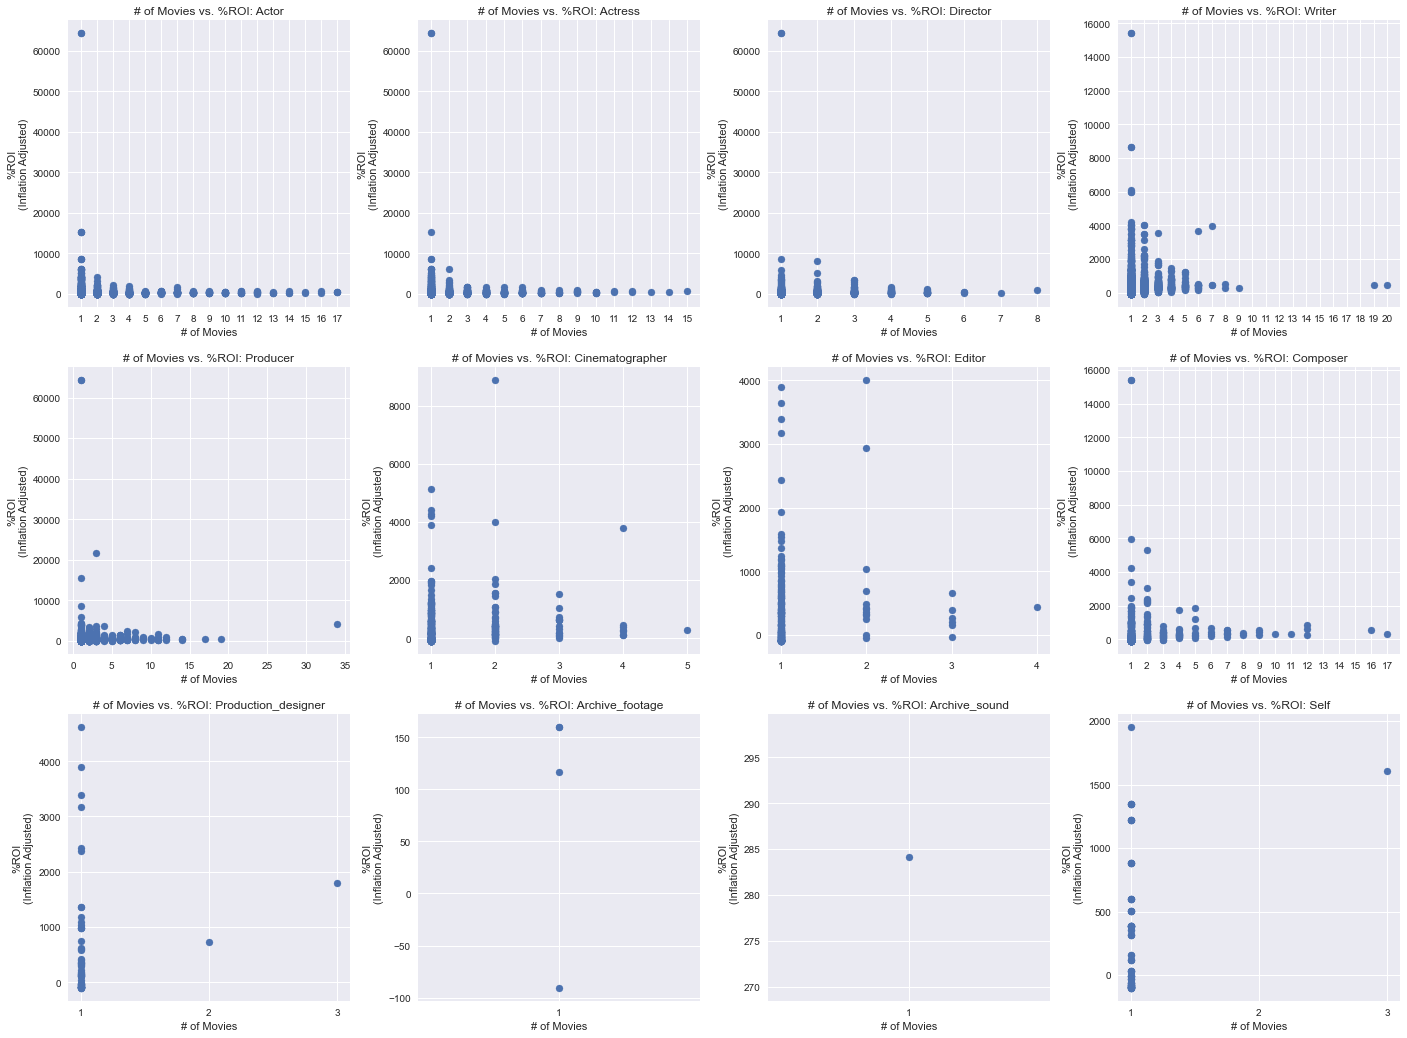

In [355]:
fig, ax = plt.subplots(3, 4, figsize=[20,15])
plt.tight_layout(pad=4)

for i,ppl in enumerate(pplorder):
    r = i//4
    c = i%4
    ax[r,c].scatter(x=ppl_comp[ppl]['movie_count'],y=ppl_comp[ppl]['ROI_infadj%'])
    ax[r,c].set_xlabel('# of Movies')
    ax[r,c].set_ylabel('%ROI\n(Inflation Adjusted)')
    ax[r,c].set_title(f'# of Movies vs. %ROI: {ppl.capitalize()}')
    if ppl == 'producer':
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(5))
    else:
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(1))

In [356]:
# removing people with only one movie to their name - 'one-hit wonders'
# people with movie_count >= 2
ppl_comp2 = {}
for ppl in ppl_comp.keys():
    ppl_comp2[ppl] = ppl_comp[ppl][ppl_comp[ppl]['movie_count'] >= 2]

In [360]:
# people with movie_count >= 3
ppl_comp3 = {}
for ppl in ppl_comp.keys():
    ppl_comp3[ppl] = ppl_comp[ppl][ppl_comp[ppl]['movie_count'] >= 3]

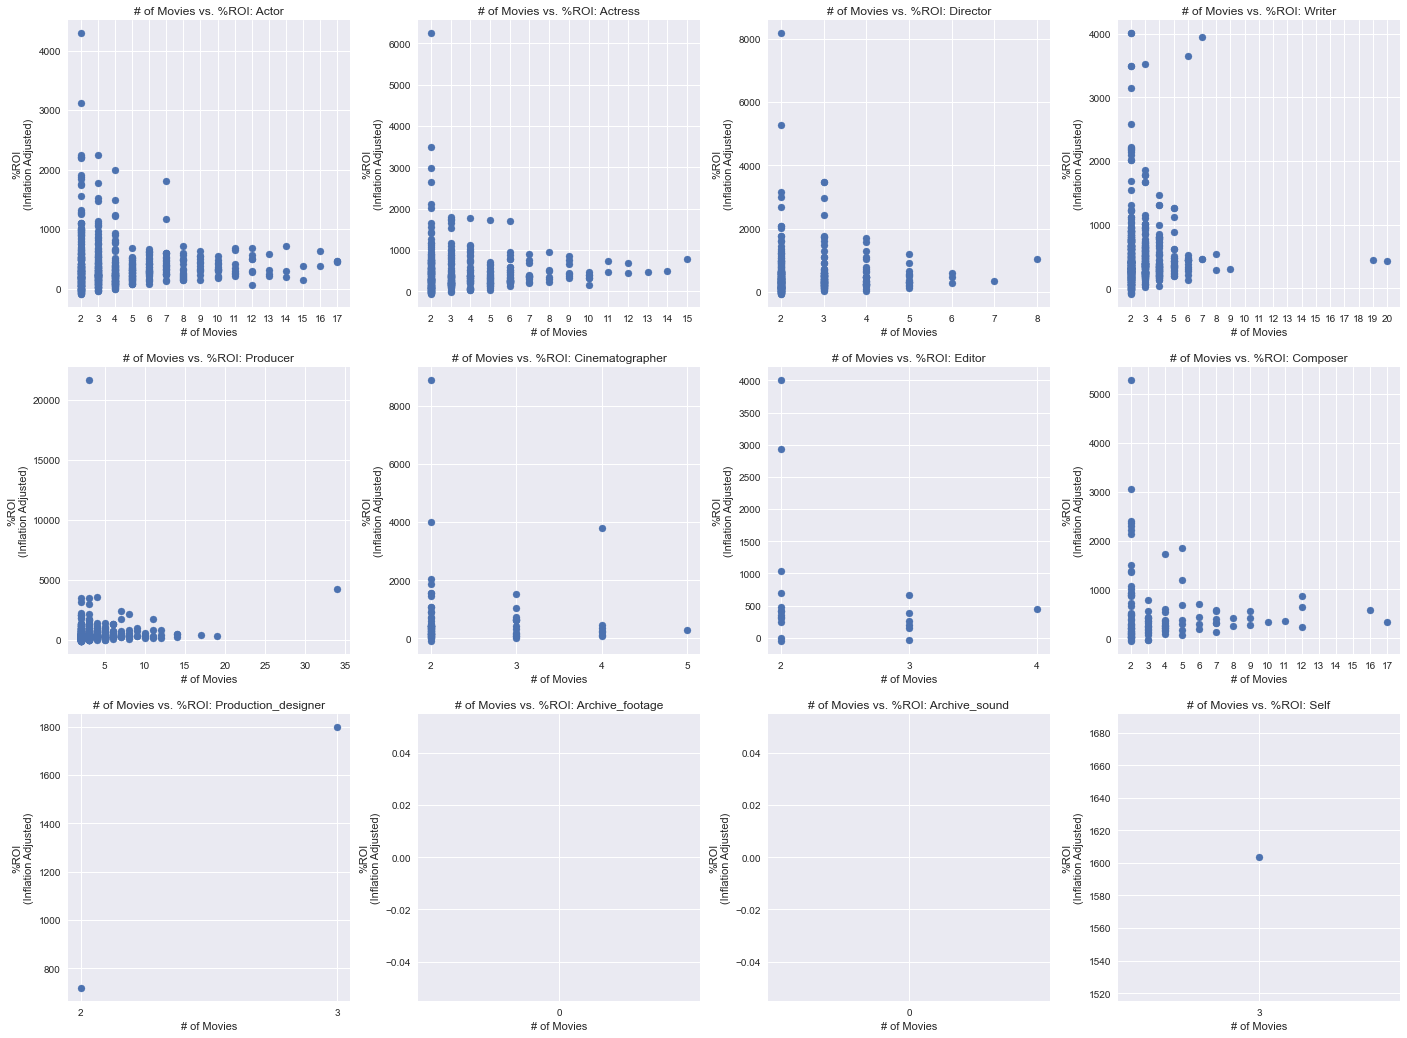

In [361]:
fig, ax = plt.subplots(3, 4, figsize=[20,15])
plt.tight_layout(pad=4)

for i,ppl in enumerate(pplorder):
    r = i//4
    c = i%4
    ax[r,c].scatter(x=ppl_comp2[ppl]['movie_count'],y=ppl_comp2[ppl]['ROI_infadj%'])
    ax[r,c].set_xlabel('# of Movies')
    ax[r,c].set_ylabel('%ROI\n(Inflation Adjusted)')
    ax[r,c].set_title(f'# of Movies vs. %ROI: {ppl.capitalize()}')
    if ppl == 'producer':
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(5))
    else:
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(1))

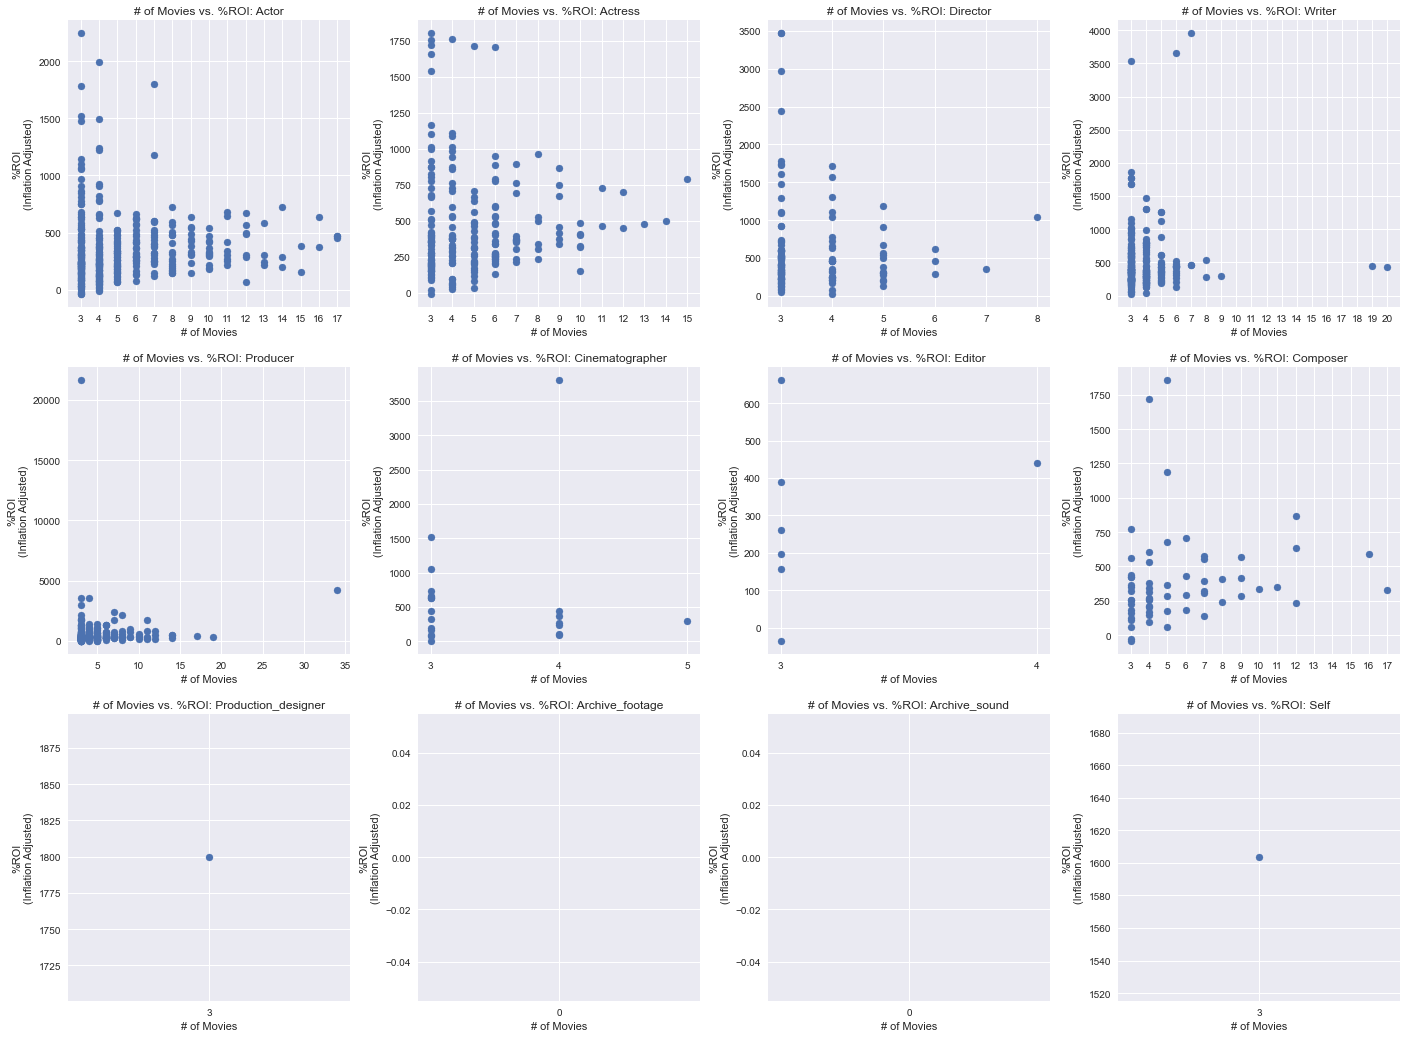

In [362]:
fig, ax = plt.subplots(3, 4, figsize=[20,15])
plt.tight_layout(pad=4)

for i,ppl in enumerate(pplorder):
    r = i//4
    c = i%4
    ax[r,c].scatter(x=ppl_comp3[ppl]['movie_count'],y=ppl_comp3[ppl]['ROI_infadj%'])
    ax[r,c].set_xlabel('# of Movies')
    ax[r,c].set_ylabel('%ROI\n(Inflation Adjusted)')
    ax[r,c].set_title(f'# of Movies vs. %ROI: {ppl.capitalize()}')
    if ppl == 'producer':
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(5))
    else:
        ax[r,c].xaxis.set_major_locator(plt.MultipleLocator(1))

In [363]:
# averages for movie counts, %ROI
# %ROI both unweighted and weighted with number of movies
ppl_comp_avgs = {}
for ppl in ppl_comp.keys():
    ppl_comp_avgs[f'{ppl}_movie_count'] = ppl_comp[ppl]['movie_count'].mean()
    ppl_comp_avgs[f'{ppl}_%ROI_avg'] = ppl_comp[ppl]['ROI_infadj%'].mean()
    ppl_comp_avgs[f'{ppl}_%ROI_movwtavg'] = (ppl_comp[ppl]['ROI_infadj%']*ppl_comp[ppl]['movie_count']).mean()
    
ppl_comp2_avgs = {}
for ppl in ppl_comp2.keys():
    ppl_comp2_avgs[f'{ppl}_movie_count'] = ppl_comp2[ppl]['movie_count'].mean()
    ppl_comp2_avgs[f'{ppl}_%ROI_avg'] = ppl_comp2[ppl]['ROI_infadj%'].mean()
    ppl_comp2_avgs[f'{ppl}_%ROI_movwtavg'] = (ppl_comp2[ppl]['ROI_infadj%']*ppl_comp2[ppl]['movie_count']).mean()

ppl_comp3_avgs = {}
for ppl in ppl_comp3.keys():
    ppl_comp3_avgs[f'{ppl}_movie_count'] = ppl_comp3[ppl]['movie_count'].mean()
    ppl_comp3_avgs[f'{ppl}_%ROI_avg'] = ppl_comp3[ppl]['ROI_infadj%'].mean()
    ppl_comp3_avgs[f'{ppl}_%ROI_movwtavg'] = (ppl_comp3[ppl]['ROI_infadj%']*ppl_comp3[ppl]['movie_count']).mean()

In [366]:
# grab top 20 names in each position, for the three movie number cutoffs
ppl_compT = {}
ppl_comp2T = {}
ppl_comp3T = {}

for ppl in ppl_comp.keys():
    ppl_compT[ppl] = ppl_comp[ppl].head(10)

for ppl in ppl_comp2.keys():
    ppl_comp2T[ppl] = ppl_comp2[ppl].head(20)

for ppl in ppl_comp3.keys():
    ppl_comp3T[ppl] = ppl_comp3[ppl].head(20)

ValueError: x and y must have same first dimension, but have shapes (2,) and (20,)

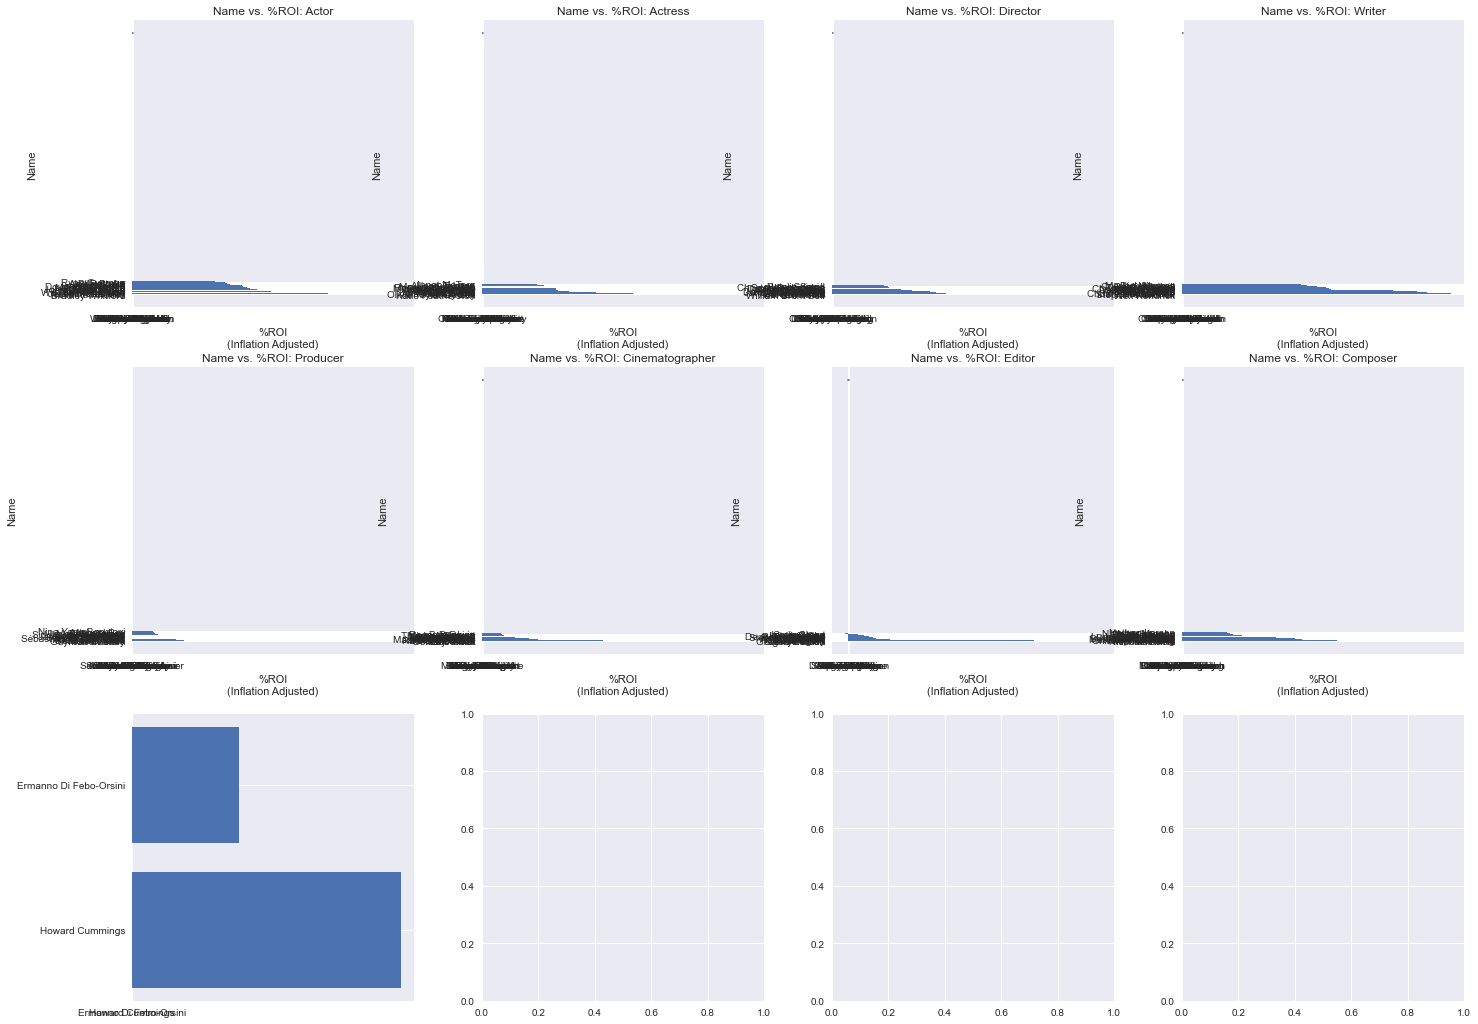

In [379]:
fig, ax = plt.subplots(3, 4, figsize=[20,15])
plt.tight_layout(pad=4)

for i,ppl in enumerate(pplorder):
    r = i//4
    c = i%4
    ax[r,c].barh(y=ppl_comp2T[ppl]['primary_name'],width=ppl_comp2T[ppl]['ROI_infadj%'])
    ax[r,c].plot(ppl_comp2T[ppl]['primary_name'],[ppl_comp2_avgs[f'{ppl}_%ROI_avg'] for x in range(20)])
    ax[r,c].set_ylabel('Name')
    ax[r,c].set_xlabel('%ROI\n(Inflation Adjusted)')
    ax[r,c].set_title(f'Name vs. %ROI: {ppl.capitalize()}')